# Test - Mystery Spec
- find peaks
- fit peaks
- get counts
- identify nuclides
http://nucleardata.nuclear.lu.se/toi/radSearch.asp


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gs_analysis as ga

from scipy.signal import find_peaks, peak_prominences

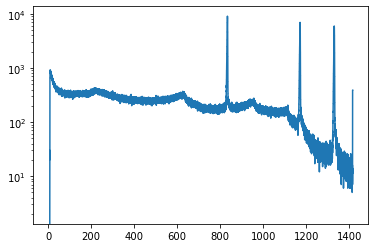

In [9]:
path = "test_data/atr_sample_1.Spe"  #mystery spec - but it plots!! 
counts, ebins = ga.get_spect(path)
ga.plot_spec(counts, erg=ebins)

[ 9646 13555 15395]
peak at index 9646 , net counts = 77777.00823045264


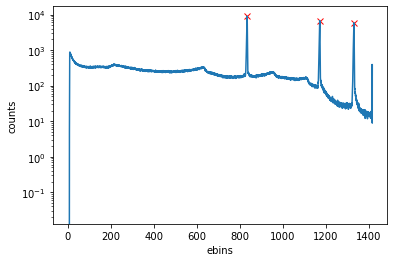

In [5]:
#peak finding
smoothed_counts, peaks = ga.peak_finder(counts, 100, 10)
print(peaks)

#plotting
ga.peak_identifier(smoothed_counts, ebins, peaks)

#counts
peak_index, counts = ga.peak_counts(peaks, 0, smoothed_counts, ebins)
print('peak at index', peak_index, ', net counts =', counts)

In [6]:
#trying to iterate for all peaks
c_arr = ([])
for i in range(len(peaks)):
    peak_index, counts = ga.peak_counts(peaks, i, smoothed_counts, ebins)
    c_arr = np.append(c_arr, counts)
    print('peak at index', peak_index, ', net counts =', counts)
    
#ebins vals and thir corresponding counts
print('peak ebins', ebins[peaks])
print('peak counts', c_arr)


peak at index 9646 , net counts = 77777.00823045264
peak at index 13555 , net counts = 56148.43209876543
peak at index 15395 , net counts = 47968.427983539106
peak ebins [ 833.853241 1171.669021 1330.681821]
peak counts [77777.00823045 56148.43209877 47968.42798354]


In [7]:
lines = ga.read_file(path)
real_time = ga.get_real_time(lines)
print(real_time)

370.0


# Identifying nuclides from peaks
http://nucleardata.nuclear.lu.se/toi/radSearch.asp , 
https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html

So from above the real time is 370 seconds

according to the file this is used: https://www.ortec-online.com/products/electronics/multichannel-analyzers-mca/workstation/dspec-lf this is used in HPGe and NaI detectors. According to wiki HPGe is a semiconductor detector and NaI is scintillation - culham has both

- to narrow down look at a few things:
    - half life - needs to be reasonable
    - likelihood - not gonna be an isotope produced by a rare sample is it
    - intensity - is it proportional to counts? are there other peaks of higher intensities on the web pages but not on the spec?
    - other lines from same nuclide - present or not?
    
###### mentioned both are seen from steel being activated (ignoring this to see if i can actually find them without)
###### e vals are also a bit off(detector probs) so its more 834, 1173 and 1332

#### Ebin val 833.853241
this is one nuclide 
- so looking at intensities its likely Ga72/As72/Mn54 - these have the highest intensities
    - looking at each spec - all have most intense peak at 834ish and no other huge peaks (though i cant seem to find an actual graph for As72) possibly small peak at 630ish for As72, 2200ish for Ga72 but nothing for Mn54 
    - so i want to lean towards Mn54?

**is there a site for all the gamma plots though? google is a bit iffy

### Mn54

#### Ebin vals 1171.669021, 1330.681821
- these are the same nuclide (from steve)
- since Steve said i looked at these before and looking just at the intensities around 1173 and 1332 its v obviously Co60. Confirms online looking at the spec.

### Co60

